In [27]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [28]:
# Files
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [29]:
# City and Ride Data
citydata_df = pd.read_csv(city_data_to_load)
citydata_df.head()

ridedata_df = pd.read_csv(ride_data_to_load)
ridedata_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [30]:
# Combine into a single dataset
mergedata_df = pd.merge(citydata_df, ridedata_df)

In [31]:
# Display preview
mergedata_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [32]:
# x and y coordinates for city types
groupdata = mergedata_df
avgfare = groupdata["fare"].mean()
totalrides = groupdata["ride_id"].count()
drivercount = groupdata["driver_count"].sum()
totaldriver = (drivercount // totalrides)

typedata = citydata_df.groupby("type")

scatterdata = pd.DataFrame({"AverageFare": [avgfare],
                        "TotalRides": [totalrides],
                        "TotalDrivers": [totaldriver]})

scatterdata["AverageFare"] = scatterdata["AverageFare"].round(2)

In [33]:
# Scatter plots for city types

# City Type
urbantype = mergedata_df.loc[mergedata_df["type"] == "Urban", :]
suburbantype = mergedata_df.loc[mergedata_df["type"] == "Suburban", :]
ruraltype = mergedata_df.loc[mergedata_df["type"] == "Rural"]

# City
cityurban = urbandata.groupby("city")
citysub = suburbandata.groupby("city")
cityrural = ruraldata.groupby("city")

# Urban
urbanfare = groupurban["fare"].mean()
urbanr_id = groupurban["ride_id"].count()
urband_count = groupurban["driver_count"].sum()
urbandrivers = (urband_count // urbanr_id)

# Suburban
subfare = groupsub["fare"].mean()
subr_id = groupsub["ride_id"].count()
subd_count = groupsub["driver_count"].sum()
subdrivers = (subd_count // subr_id)

# Rural
ruralfare = grouprural["fare"].mean()
ruralr_id = grouprural["ride_id"].count()
rurald_count = grouprural["driver_count"].sum()
ruraldrivers = (rurald_count // ruralr_id)


# Plot
urbplot = pd.DataFrame({"AverageFare": urbanfare,
                       "TotalRides": urbanr_id,
                       "TotalDrivers": urbandrivers})
urbplot["AverageFare"] = urbplot["AverageFare"].round(2)

subplot = pd.DataFrame({"AverageFare": subfare,
                     "TotalRides": subr_id,
                     "TotalDrivers": subdrivers})
subplot["AverageFare"] = subplot["AverageFare"].round(2)

rurplot = pd.DataFrame({"AverageFare": ruralfare,
                       "TotalRides": ruralr_id,
                       "TotalDrivers": ruraldrivers})
rurplot["AverageFare"] = rurplot["AverageFare"].round(2)

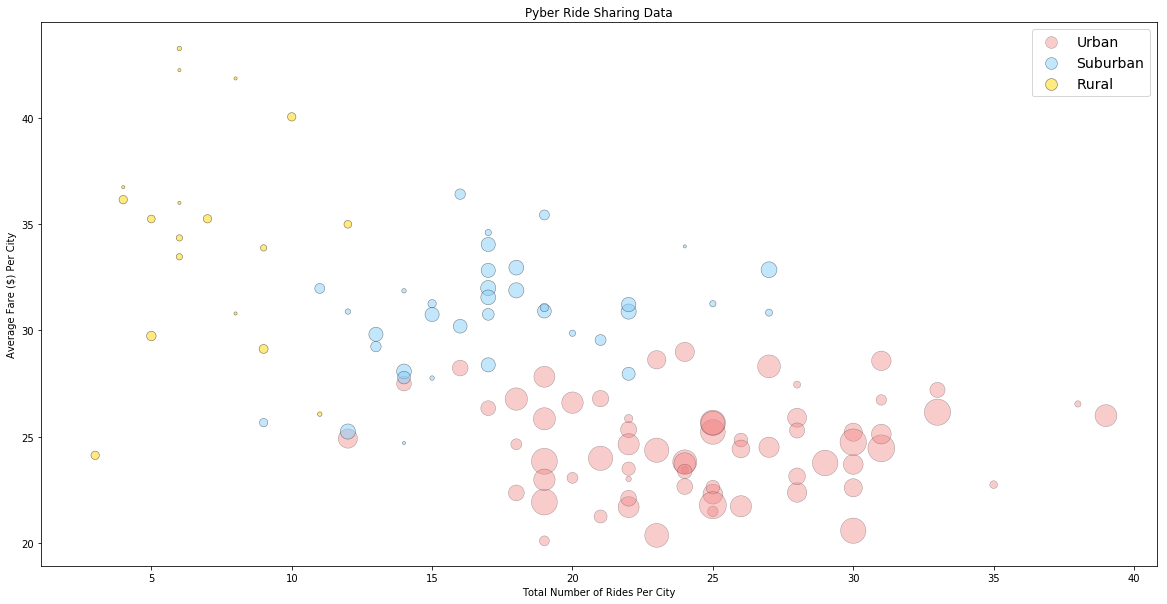

In [34]:
# Incorporate the other graph properties
bubblesize = 10
bsize = bubblesize
plt.figure(figsize=(20,10))

# Urban Scatter Plot
bubbleurb = plt.scatter(urbplot.TotalRides, urbplot.AverageFare, c="LightCoral", label = "Urban", 
                    s=(urbplot.TotalDrivers * bsize), alpha = 0.4, edgecolor = "black", linewidths = .4)

# Suburban Scatter Plot
bubblesub = plt.scatter(subplot.TotalRides, subplot.AverageFare, c="LightSkyBlue", label = "Suburban", 
                    s=(subplot.TotalDrivers * bsize), alpha = 0.5, edgecolor = "black", linewidths = .5)

# Rural Scatter Plot
bubblerur = plt.scatter(rurplot.TotalRides, rurplot.AverageFare, c="gold", label = "Rural", 
                    s=(rurplot.TotalDrivers * bsize), alpha = 0.5, edgecolor = "black", linewidths = .6)

lgnd = plt.legend(handles=[bubbleurb, bubblesub, bubblerur], scatterpoints=1, fontsize=14)
lgnd.legendHandles[0]._sizes = [140]
lgnd.legendHandles[1]._sizes = [140]
lgnd.legendHandles[2]._sizes = [140]

# Legend
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($) Per City")

# Save Figure
plt.savefig("Bubbleplot.png", bbox_inches = 'tight')

# Show plot
plt.show()

## Total Fares by City Type

In [35]:
# Calculate Type Percents

# Group Pie Charts Data by Type
gptype = mergedata_df.groupby("type")
orgptype = citydata_df.groupby("type")

# Calculate Type Percents
faretotal = mergedata_df["fare"].sum()
gpfare = gptype["fare"].sum()

gftotal = gpfare / faretotal

# Calculate Ride Percents
ridetotal = mergedata_df["ride_id"].count()
gpride = gptype["ride_id"].count()

grtotal = gpride / ridetotal

# Calculate Driver Percents
drivertotal = citydata_df["driver_count"].sum()
gpdriver = orgptype["driver_count"].sum()

gdtotal = gpdriver / drivertotal

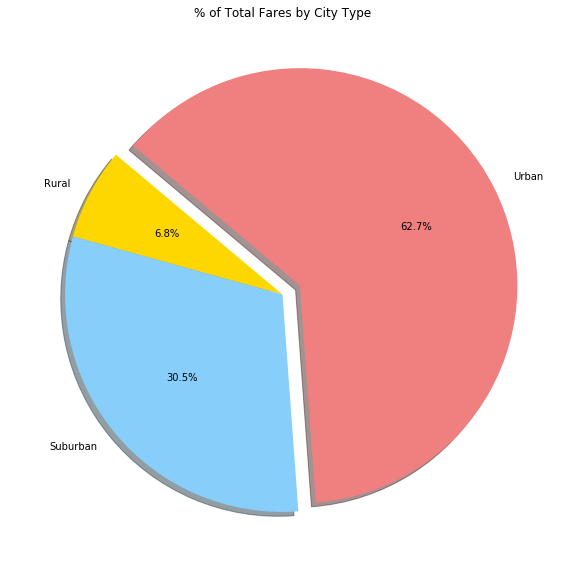

In [36]:
# Build Pie Chart
explode = (0, 0, 0.09)
labels = gftotal.index.tolist()
colors = ["gold", "LightSkyBlue", "LightCoral"]
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 10.0
plt.pie(gftotal, labels = labels, explode = explode, colors = colors, startangle = 140, shadow = True, autopct="%1.1f%%")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Total_Fares.png", bbox_inches = 'tight')
plt.show()

## Total Rides by City Type

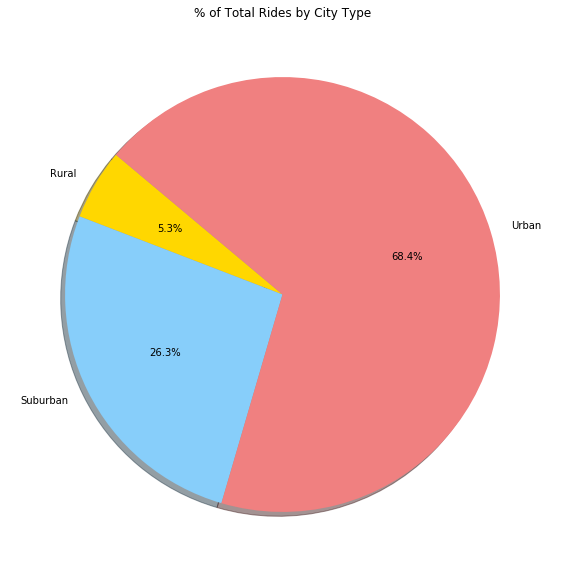

In [37]:
# Build Pie Chart
labels = grtotal.index.tolist()
colors = ["gold", "LightSkyBlue", "LightCoral"]
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 10.0
plt.pie(grtotal, labels = labels, colors = colors, startangle = 140, shadow = True, autopct="%1.1f%%")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Total_Rides.png", bbox_inches = 'tight')
plt.show()

## Total Drivers by City Type

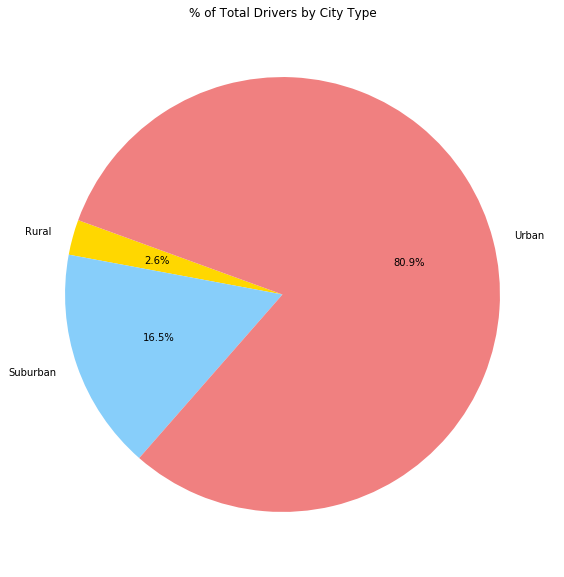

In [38]:
# Build Pie Charts
labels = gdtotal.index.tolist()
colors = ["gold", "LightSkyBlue", "LightCoral"] 
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 10.0
plt.pie(gdtotal, labels = labels, colors = colors, startangle = 160, shadow = False, autopct="%1.1f%%")
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Total_Drivers.png", bbox_inches = 'tight')
plt.show()